# __Exploratory Data Analysis__

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 1. Roaming_data
|컬럼명|컬럼한국명|컬럼설명|샘플|
|:-----:|:-----:|:------|:------:|
return|귀국일|로밍 여행자가 한국에 귀국한 날짜|20200131
iso |국가코드|2자리 국가코드|us
arrival |입국일|iso 국가에 도착한 날짜|20200125
departure|출국일|iso 국가에서 떠난 날짜|20200127
count|고객수|return 일자에 귀국한 로밍 고객 중 iso국가에 arrival에 도착해서 departure에 떠난 고객 수|3


[국가코드 표](http://img.echosting.cafe24.com/guide/country_code_table.pdf)

In [5]:
roam = pd.read_csv('./data/corona_contest_data_0406/2. Roaming_data.csv')

In [15]:
roam.head(5)

,return,iso,arrival,departure,count
0,20200131,ad,20200130,20200130,3
1,20200131,ae,20191231,20200125,3
2,20200131,ae,20191231,20200131,3
3,20200131,ae,20200102,20200102,3
4,20200131,ae,20200104,20200131,3


In [17]:
roam.describe().T

,count,mean,std,min,25%,50%,75%,max
return,212325.0,2.019772e+07,4000.485699,20191201.0,20191229.0,20200122.0,20200213.0,20200331.0
arrival,212325.0,2.019678e+07,4349.178082,20191031.0,20191220.0,20200112.0,20200204.0,20200331.0
departure,212325.0,2.019713e+07,4247.698404,20191031.0,20191223.0,20200115.0,20200207.0,20200331.0
count,212325.0,9.172853e+00,31.835063,3.0,3.0,3.0,5.0,1687.0


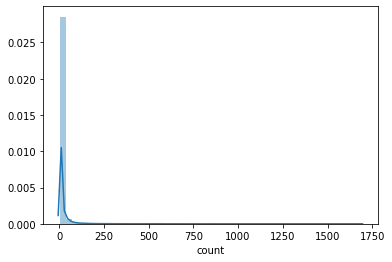

In [20]:
sns.distplot(roam['count'])

In [41]:
# 국가 총 갯수

print('국가 코드 값\n', roam['iso'].unique(), end='\n')
print('')
print('총 갯수 : ', len(roam['iso'].unique()))

국가 코드 값
 ['ad' 'ae' 'af' 'am' 'ao' 'ar' 'at' 'au' 'az' 'ba' 'bd' 'be' 'bg' 'bh'
 'bn' 'bo' 'br' 'bw' 'by' 'ca' 'ch' 'cl' 'cn' 'co' 'cy' 'cz' 'de' 'dk'
 'dz' 'ec' 'ee' 'eg' 'es' 'et' 'fi' 'fj' 'fr' 'ga' 'gb' 'ge' 'gh' 'gr'
 'gu' 'hk' 'hr' 'ht' 'hu' 'id' 'ie' 'il' 'in' 'iq' 'ir' 'it' 'jm' 'jo'
 'jp' 'ke' 'kg' 'kh' 'kw' 'kz' 'la' 'lk' 'ls' 'lt' 'lu' 'lv' 'ma' 'mc'
 'me' 'mk' 'mm' 'mn' 'mo' 'mp' 'mt' 'mu' 'mv' 'mx' 'my' 'mz' nan 'na' 'ng'
 'ni' 'nl' 'no' 'np' 'nz' 'om' 'pa' 'pe' 'pg' 'ph' 'pk' 'pl' 'ps' 'pt'
 'py' 'qa' 'ro' 'rs' 'ru' 'rw' 'sa' 'sc' 'sd' 'se' 'sg' 'si' 'sk' 'sr'
 'sv' 'th' 'tm' 'tr' 'tw' 'tz' 'ug' 'us' 'uy' 'uz' 'vn' 'za' 'zm' 'zw'
 'al' 'bz' 'cr' 'gt' 'hn' 'is' 'lb' 'md' 'tk' 'ua' 'li' 'mg' 'an' 'do'
 'pr' 'to' 'tt' 'cm' 'pf' 'tg' 'tn' 'vu' 'bj' 'bt' 'cd' 'ci' 'tl' 'tp'
 'gn' 'lr' 'mr' 'mw' 'ky' 'td' 'cf' 'ne' 're' 'tc' 'ml' 'ly' 'sl' 'bf'
 'gq' 'cv' 'gm' 'ye' 'ws']

총 갯수 :  174


Text(0.5, 1.0, 'Top 30 Country')

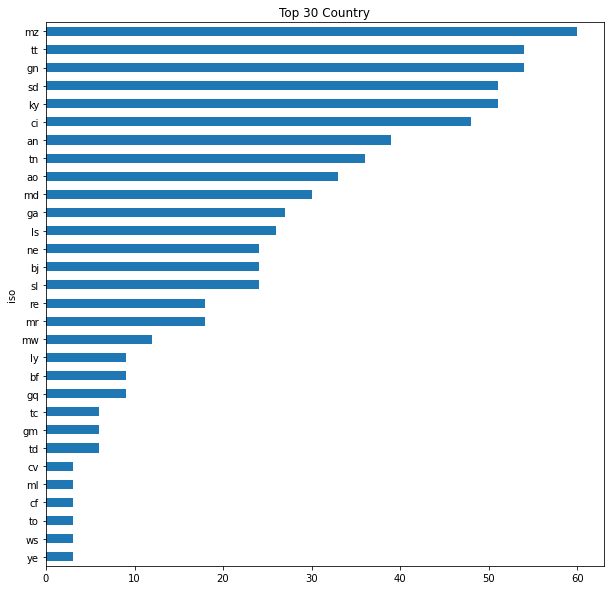

In [77]:
# 국가 별 데이터 분포

tmp = roam.groupby(by='iso', as_index=True)['count'].sum().sort_values().head(30)
tmp.plot(kind='barh', figsize=(10,10))
plt.title('Top 30 Country')

- 로밍 
- 모잠비크, 기니, 트리니다드토바고, 수단, 케이맨섬

In [81]:
tmp.sort_values(ascending=False)

iso
mz    60
gn    54
tt    54
sd    51
ky    51
ci    48
an    39
tn    36
ao    33
md    30
ga    27
ls    26
ne    24
bj    24
sl    24
mr    18
re    18
mw    12
ly     9
bf     9
gq     9
tc     6
gm     6
td     6
cv     3
ml     3
cf     3
to     3
ws     3
ye     3
Name: count, dtype: int64

# 2. 감염병데이터

|컬럼명|컬럼한국명|컬럼설명|샘플|
|:-----:|:-----:|:------|:------:|
파일명|파일명|파일리스트의 파일명과 일치|AFRO2019120200003
제목|제목|기사의 제목|WHO supports Angola’s Government efforts to end polio outbreak
URL|원문기사링크|해당 기사의 원문 링크|https://www.afro.who.int/news/who-supports-angolas-government-efforts-end-polio-outbreak
수집일자|수집일자|KT 크롤링 시스템에 의해 기사가 수집된 날짜|2019-12-02 21:00:16.0
게시일자|게시일자|원문 Site에 해당 기사가 게시된 날짜|2019-12-02 00:00:00
채널명|채널명|기사가 게시된 Site의 이름|AFRO
감염병명|감염병명|기사에 표기된 감염병의 이름|Poliomyelitis
분류명|분류명|감염병의 분류(카테고리) 명|Viral


In [13]:
news = pd.read_excel('./data/corona_contest_data_0406/3-1. NewsList.xls', sheet_name="List")

In [14]:
news.head()

,파일명,제목,URL,수집일자,게시일자,채널명,감염병명,분류명
0,AFRO2019120200003,WHO supports Angola’s Government efforts to en...,https://www.afro.who.int/news/who-supports-ang...,2019-12-02 21:00:16.0,2019-12-02 00:00:00,AFRO,Poliomyelitis,Viral
1,AFRO2019120300001,African First Ladies laud progress against HIV...,https://www.afro.who.int/news/african-first-la...,2019-12-03 00:00:17.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
2,AFRO2019120300002,Eritrea Observed World AIDS Day 2019,https://www.afro.who.int/news/eritrea-observed...,2019-12-03 00:00:18.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
3,AFRO2019120400003,West and Central Africa Expands Access to HIV ...,https://www.afro.who.int/news/west-and-central...,2019-12-04 03:00:14.0,2019-12-03 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
4,AFRO2019120400004,Nearly 23 million voluntary male medical circu...,https://www.afro.who.int/news/nearly-23-millio...,2019-12-04 22:00:14.0,2019-12-04 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
